# Exploratory Data Analysis

- Cleaning Data

### EDA Scenario:
    
Boss needs a report on the Colorado Spills data over the last few years and wants you to find the answers to the following questions:
- How many reporting violations happened in the dataset?
- What operator had the most spills?
- Compared to 2019, for 2020 has the amount of oil spilled increased or decreased and by how much?
- Anything else noteworthy in the dataset?

Other constraints from your initial meeting with your boss:
- Data starts in 2014 with digital reporting (anything before 2014 was manually entered after the fact and might not be as accurate - please don't use data prior to 2014 for this analysis)
- A reporting violation happens when the company does not reporting a spill within the 10 day window
- The mobile app went into 'production' on Mar 15th, 2019. 

### Data

This spill data was taken from the Colorado Oil and Gas Commission downloads here:
https://cogcc.state.co.us/data2.html#/downloads

The dataset also comes with a data dictionary which is included in this lesson.
The data was modified from its original form to showcase some examples for this lesson. 

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
spills_df = pd.read_excel('CO_Spills_example.xlsx')

spills_df.columns = ['Document_num', 'Report', 'Operator', 'Operator_num', 'Tracking_num', 'Initial_report_date',
                     'Date_of_discovery', 'Latitude', 'Longitude', 'Municipality', 'County', 'Facility_type', 'Facility_id',
                     'Spilled_outside_of_berms', 'More_than_five_barrels_spilled', 'Oil_spill_volume', 'Current_land_use',
                     'Weather_conditions', 'Waters_of_the_state', 'Residence_occupied_structure', 'Livestock', 'Public_byway',
                     'Surface_water_supply_area', 'Spill_description', 'Oil_bbls_spilled', 'Oil_bbls_recovered',
                     'Oil_unknown', 'Corrective_actions_completed']

print(len(spills_df))
spills_df.head()

10914


,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
0,400476365,I,BP AMERICA PRODUCTION COMPANY,10000,400476365,08/30/2013,08/30/2013,37.143657,-107.779270,NaN,LA PLATA,WELL,NaN,N,Y,0,OTHER,unknown,0.0,0.0,0.0,0.0,0.0,Tank bottom on 300 bbl produced water tank lea...,NaN,NaN,NaN,False
1,400579956,I,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,NaN,NaN,NaN,False
2,400584981,I,ENCANA OIL & GAS (USA) INC,100185,400584981,04/07/2014,03/15/2013,40.076974,-105.049520,NaN,WELD,TANK BATTERY,NaN,Y,N,Unknown,NON-CROP LAND,Clear cold,1.0,0.0,0.0,0.0,0.0,While digging trenches for new dumplines the c...,NaN,NaN,NaN,False
3,400596170,S,ENCANA OIL & GAS (USA) INC,100185,400579956,03/27/2014,03/26/2014,40.032395,-104.964942,NaN,BROOMFIELD,TANK BATTERY,NaN,N,N,0,CROP LAND,Clear and cool,1.0,0.0,0.0,0.0,1.0,A high water table at Encana’s Helen E Unit 1 ...,0,0.0,0.0,False
4,400596597,I,XTO ENERGY INC,100264,400596597,04/25/2014,04/24/2014,37.149079,-104.886956,NaN,LAS ANIMAS,WELL,NaN,Y,Y,0,NON-CROP LAND,Clear/Sunny,0.0,0.0,0.0,0.0,0.0,"At 1:45 p.m.., 04-24-14, XTO Artificial Lift S...",NaN,NaN,NaN,False


##### Items to do in this lesson:

1) Duplicate document_numbers?\
2) Initial_report_date - filter out dates before 2014\
3) Oil_Spill_Volume - make into a dummy variable\
4) Fix Oil_BBLs_Spilled column\
5) Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y/N/n values need to be standardized\
6) Standardize the binary columns to 1.0/0.0: Y/N, 1.0/0.0 & True/False\
7) Maybe drop columns: Report, Tracking_num, Latitude, Longitude, Municipality, Facility_ID, Weather_Conditions, Spill_Description

##### 1) Duplicate document_numbers?

I want to investigate why there are duplicate document numbers. Document_num seems to be the 'primary key' in this database and most likely wouldn't contain duplicates.

I keep a log of my Assumptions - these are choices I'm making with the data that could be incorrect and foul up the analysis. In the next meeting, these are the first things I want to ask the subject matter experts. For this exercise, I made a new cell each time I added an assumption and have the full list at the bottom.

The assumption I'm making here is that duplicate records dont have any additional information. That is, that the duplicate information is the same information entered twice or more by some error in the data entry, database storing or data engineering process.

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed

With pandas you can drop exact duplicates with the default drop_duplicates command. By default drop_duplicates keeps the first record if more than one record are duplicates. I'll check the length before and after to see how many duplicates were dropped.

A note about the function switch ```inplace=True```: ```inplace=True``` means save the new df over the old df. This does not save space or execution time so there are plans for it to be dropped in future version. Therefore, I won't use it in this notebook.

In [3]:
print("Length before drop:", len(spills_df))

spills_df = spills_df.drop_duplicates()

print("Length after:", len(spills_df))

Length before drop: 10914
Length after: 10875


This dropped about 40 records. Let's see if that was the only issue:

In [4]:
spills_df['Document_num'].value_counts(dropna=False)

401517093    2
401169736    2
402531111    2
402411518    1
402693801    1
            ..
402366326    1
400865938    1
401711761    1
402380378    1
401825315    1
Name: Document_num, Length: 10872, dtype: int64

No looks like there are a few more duplicates - lets take a look at each and come up with a strategy.

In [5]:
spills_df[spills_df['Document_num']==401517093]

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
5572,401517093,S,CONOCO PHILLIPS COMPANY,19160,401498249,12/29/2017,12/28/2017,39.663997,-104.624589,NaN,ARAPAHOE,WELL,451301.0,N,Y,0,NON-CROP LAND,Clear,0.0,0.0,0.0,0.0,0.0,While displacing the wellbore with packer flui...,0,0.0,0.0,False
5573,401517093,S,CONOCO PHILLIPS COMPANY,19160,401498249,12/29/2017,12/28/2017,39.663997,-104.624589,NaN,ARAPAHOE,WELL,451301.0,N,Y,0,NON-CROP LAND,Clear,0.0,0.0,0.0,0.0,0.0,While displacing the wellbore with packer flui...,NaN,NaN,0.0,False


In [6]:
spills_df[spills_df['Document_num']==401169736]

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
3924,401169736,S,CHEVRON USA INC,16700,401165684,12/12/2016,12/11/2016,40.141475,-108.920888,NaN,RIO BLANCO,OTHER,NaN,Y,Y,0,NON-CROP LAND,20-40 degrees F. clear to partly cl,0.0,0.0,0.0,0.0,0.0,Internal corrosion on an injection line result...,0,0.0,0.0,False
3925,401169736,S,CHEVRON USA INC,16700,401165684,12/12/2016,12/11/2016,40.141475,-108.920888,NaN,RIO BLANCO,OTHER,NaN,Y,Y,0,NON-CROP LAND,20-40 degrees F. clear to partly cl,0.0,0.0,0.0,0.0,0.0,Internal corrosion on an injection line result...,NaN,NaN,0.0,False


In [7]:
spills_df[spills_df['Document_num']==402531111]

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
9863,402531111,I w/S,KERR MCGEE GATHERING LLC,47121,402531111,11/12/2020,11/12/2020,40.242378,-104.665652,NaN,WELD,TANK BATTERY,NaN,y,n,Unknown,OTHER,Sunny 30°F,0.0,0.0,0.0,0.0,0.0,A small release from a valve at the Beebe Draw...,NaN,NaN,1.0,True
9864,402531111,I w/S,KERR MCGEE GATHERING LLC,47121,402531111,11/12/2020,11/12/2020,40.242378,-104.665652,NaN,WELD,TANK BATTERY,NaN,y,n,Unknown,OTHER,Sunny 30°F,0.0,0.0,0.0,0.0,0.0,A small release from a valve at the Beebe Draw...,NaN,NaN,0.0,True


All of these columns have NaNs in the second entry compared to the first - I think its safe to keey the first entry here dropping on the subset of the Document_Num.

In [8]:
print("Length before drop:", len(spills_df))

spills_df = spills_df.drop_duplicates(subset='Document_num', keep='first')

print("Length after:", len(spills_df))
spills_df['Document_num'].value_counts(dropna=False)

Length before drop: 10875
Length after: 10872


402411518    1
402693801    1
401354023    1
402316097    1
400981285    1
            ..
402366326    1
400865938    1
401711761    1
402380378    1
401825315    1
Name: Document_num, Length: 10872, dtype: int64

The 3 entries check with the duplicates and now the value_counts show no duplicates also!

##### 2) Initial_report_date - filter out dates before 2014

The boss didnt want records before 2014 included due to issues with the accuracy. I'll filter those out now. I can sort the values of that column by the Date_of_Discovery to check if any dates are before 2014. I used Date_of_Discovery because it is complete (no Nulls) but this is an assumption so I'll list it. 

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.

##### Fixing the datetime columns

- Pandas has a great way to change the type to datetime
- You can also provide the format in case it is something non-standard
  - The % codes are here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [9]:
spills_df['Initial_report_date'] = pd.to_datetime(spills_df['Initial_report_date'])

In [10]:
spills_df['Date_of_discovery'] = pd.to_datetime(spills_df['Date_of_discovery'], format='%m/%d/%Y')

In [11]:
spills_df[['Initial_report_date','Date_of_discovery']].dtypes

Initial_report_date    datetime64[ns]
Date_of_discovery      datetime64[ns]
dtype: object

##### Filtering by date

In [12]:
spills_df.sort_values(['Date_of_discovery']).head(10)

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed
9106,402349927,I w/S,ANADARKO DJ GAS PROCESSING LLC,10719,402349927,2020-03-23,1994-11-14,39.748143,-104.680174,NaN,ADAMS,GAS PROCESSING PLANT,255983.0,Y,N,0,CROP LAND,"Unknown, historical release",1.0,0.0,0.0,0.0,0.0,Two Flare Fluid Storage Pits (#1 and #2) were ...,NaN,NaN,1.0,False
8050,402116460,I w/S,NGL WATER SOLUTIONS DJ LLC,10373,402116460,2019-07-22,2004-01-01,40.016567,-104.887064,NaN,WELD,PRODUCED WATER TRANSFER SYSTEM,NaN,N,N,0,CROP LAND,Overcast,0.0,0.0,0.0,0.0,0.0,Minor spill near wellhead,NaN,NaN,NaN,False
7126,401893556,I w/S,BONANZA CREEK ENERGY OPERATING COMPANY LLC,8960,401893556,2019-01-04,2009-01-24,40.306570,-104.520309,NaN,WELD,TANK BATTERY,323325.0,N,Y,Unknown,NON-CROP LAND,"Cold, Snow",0.0,0.0,0.0,0.0,0.0,This is a historic release that as initially r...,NaN,NaN,1.0,True
1068,400772820,I,ENCANA OIL & GAS (USA) INC,100185,400772820,2015-01-15,2009-05-27,39.441640,-107.994100,NaN,GARFIELD,PIT,425759.0,N,N,0,NON-CROP LAND,NA,0.0,0.0,0.0,0.0,0.0,This Form 19 is being submitted in accordance ...,NaN,NaN,NaN,False
1273,400801881,S,ENCANA OIL & GAS (USA) INC,100185,400772820,2015-01-15,2009-05-27,39.441640,-107.994100,NaN,GARFIELD,PIT,425759.0,N,N,0,NON-CROP LAND,NA,0.0,0.0,0.0,0.0,0.0,This Form 19 is being submitted in accordance ...,NaN,NaN,NaN,False
47,400605771,S,XTO ENERGY INC,100264,400597491,2014-04-28,2010-01-29,39.905251,-108.261991,NaN,RIO BLANCO,WELL PAD,NaN,Y,Y,0,NON-CROP LAND,Unknown,0.0,0.0,0.0,0.0,0.0,Sub-liner impacts below the Reserve and Freshw...,0,0.0,0.0,False
8,400597491,I,XTO ENERGY INC,100264,400597491,2014-04-28,2010-01-29,39.905251,-108.261991,NaN,RIO BLANCO,WELL PAD,NaN,Y,Y,0,NON-CROP LAND,Unknown,0.0,0.0,0.0,0.0,0.0,Sub-liner impacts below the Reserve and Freshw...,NaN,NaN,NaN,False
37,400603990,S,XTO ENERGY INC,100264,400599061,2014-04-30,2010-06-04,39.866380,-108.209040,NaN,RIO BLANCO,WELL PAD,NaN,Y,Y,0,NON-CROP LAND,Unknown,0.0,0.0,0.0,0.0,0.0,Subliner impacts below the partially buried ta...,0,0.0,0.0,False
12,400599061,I,XTO ENERGY INC,100264,400599061,2014-04-30,2010-06-04,39.866380,-108.209040,NaN,RIO BLANCO,WELL PAD,NaN,Y,Y,0,NON-CROP LAND,Unknown,0.0,0.0,0.0,0.0,0.0,Subliner impacts below the partially buried ta...,NaN,NaN,NaN,False
1139,400784283,S,ENCANA OIL & GAS (USA) INC,100185,400774751,2015-01-19,2010-06-07,39.418400,-108.013600,NaN,GARFIELD,PIT,425762.0,N,N,0,NON-CROP LAND,NA,0.0,0.0,0.0,0.0,0.0,This Form 19 is being submitted in accordance ...,NaN,NaN,NaN,False


In [13]:
print("Length before filter:", len(spills_df))

spills_df = spills_df[spills_df['Date_of_discovery'] >= '2014-01-01']

print("Length after:", len(spills_df))

Length before filter: 10872
Length after: 10793


##### 3) Oil_Spill_Volume - make into a binary variable across new columns

I can make a binary or 'indicator' variable out of a category by using the get_dummies() function in pandas. You will hear a lot of people use the word dummies to mean a binary variable. It’s a bad choice of a word, and we’ll try to use the word indicator variable, but pandas still uses dummies as we’re filming this. 

What this function does is to take a column and make a dummy/flag column for each value and then put a 1 or a 0 in that column if that row has that value. This is useful for machine learning as a way a categorical column is made into numeric columns.

In [18]:
osv_df = pd.get_dummies(spills_df['Oil_spill_volume'], prefix='OSV')
osv_df

,OSV_0,OSV_>0 and <1,OSV_>=1 and <5,OSV_>=100,OSV_>=5 and <100,OSV_Unknown
1,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
7,1,0,0,0,0,0
...,...,...,...,...,...,...
10882,1,0,0,0,0,0
10883,0,0,0,0,0,1
10884,0,0,1,0,0,0
10885,0,0,0,0,0,1


In [19]:
osv_df.columns

Index(['OSV_0', 'OSV_>0 and <1', 'OSV_>=1 and <5', 'OSV_>=100',
       'OSV_>=5 and <100', 'OSV_Unknown'],
      dtype='object')

In [20]:
osv_df.columns = ['OSV_0', 'OSV_gt_0_lt_1', 'OSV_gte_1_lt_5', 'OSV_gte_100', 'OSV_gte_5_lt_100', 'OSV_Unknown']

In [21]:
# Concat back to original

spills_df = pd.concat([spills_df, osv_df], axis=1)

In [22]:
spills_df[['Oil_spill_volume','OSV_0', 'OSV_gt_0_lt_1', 'OSV_gte_1_lt_5', 'OSV_gte_100', 'OSV_gte_5_lt_100', 'OSV_Unknown']]

,Oil_spill_volume,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown
1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
10882,0,1,0,0,0,0,0
10883,Unknown,0,0,0,0,0,1
10884,>=1 and <5,0,0,1,0,0,0
10885,Unknown,0,0,0,0,0,1


##### 4) Fix Oil_BBLs_Spilled column

When I try to cast this column as a float I get an error:

In [23]:
spills_df['Oil_bbls_spilled'] = spills_df['Oil_bbls_spilled'].astype(float)

ValueError: could not convert string to float: '""'

##### Value_counts

Again, I can check out the values using value_counts(). I use head(25) just to get the top 25 values.

In [24]:
spills_df['Oil_bbls_spilled'].value_counts(dropna=False).head(25)

NaN    7093
0      2859
1       185
2       106
5        69
3        65
10       44
4        36
15       21
20       21
7        19
12       19
6        17
8        16
""       16
25       14
30       13
18       12
50       10
9         7
45        6
120       6
60        6
13        6
80        5
Name: Oil_bbls_spilled, dtype: int64

From here, the value counts show the "" is used 16 times. 
Before I replace the values in this column let's look at a subset of data with the "" as the value for this column.

After checking through data and finding no concrete correlations and looking at the data dictionary: \
\
Oil BBLs Spilled
- The volume of oil in barrels spilled. If blank, that means the amount is unknown and the “Unknown” checkbox is checked on the Form 19

NOTE: The "" **may** mean something. Some examples that come to mind might be user input error, leaving that column blank, duplicate records, a column that can be overridden by user-entry etc. 

I'm going to make the assumption that for this column I can replace the "" with NaNs.

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.
- "" in Oil_BBLs_Spilled means Unknown and I replace with NaN

In [25]:
spills_df[spills_df['Oil_bbls_spilled'] == '""']

,Document_num,Report,Operator,Operator_num,Tracking_num,Initial_report_date,Date_of_discovery,Latitude,Longitude,Municipality,County,Facility_type,Facility_id,Spilled_outside_of_berms,More_than_five_barrels_spilled,Oil_spill_volume,Current_land_use,Weather_conditions,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Spill_description,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown
983,400759851,I,PICEANCE ENERGY LLC,10433,400759851,2014-12-29,2014-12-27,39.489332,-107.811397,NaN,GARFIELD,WELL PAD,335165.0,Y,Y,0,NON-CROP LAND,"Overcast, snow on ground.",0.0,0.0,0.0,0.0,0.0,"On December 27th, while field pumper was makng...","""""",NaN,NaN,False,1,0,0,0,0,0
984,400759904,I,CHEVRON PRODUCTION COMPANY,16700,400759904,2014-12-29,2014-12-27,40.128600,-108.876100,NaN,RIO BLANCO,FLOWLINE,NaN,Y,Y,0,NON-CROP LAND,10 degrees and sunny,0.0,0.0,0.0,0.0,0.0,Saturday (12-27-2014) at approximately 8:30 AM...,"""""",NaN,NaN,False,1,0,0,0,0,0
988,400760161,I,PIONEER NATURAL RESOURCES USA INC,10084,400760161,2014-12-29,2014-12-28,37.200370,-104.915260,NaN,LAS ANIMAS,WELL PAD,333366.0,Y,N,0,NON-CROP LAND,sunny,0.0,0.0,0.0,0.0,0.0,"Bruscher 008 discharge point was shut down, wh...","""""",NaN,NaN,False,1,0,0,0,0,0
990,400760999,I,BONANZA CREEK ENERGY OPERATING COMPANY LLC,8960,400760999,2014-12-30,2014-12-27,40.411940,-104.222810,NaN,WELD,TANK BATTERY,436843.0,Y,Y,0,NON-CROP LAND,"-4 degrees, clear",0.0,0.0,0.0,0.0,0.0,"During routine site inspection, Bonanza Creek ...","""""",NaN,NaN,False,1,0,0,0,0,0
997,400761593,I,KESTREL RESOURCES INC,47085,400761593,2014-12-30,2014-11-04,39.802572,-103.055201,NaN,WASHINGTON,TANK BATTERY,107535.0,Y,Y,0,NON-CROP LAND,UNK,0.0,0.0,0.0,0.0,0.0,Eastern wall of referenced PW pit has been fai...,"""""",NaN,NaN,False,1,0,0,0,0,0
2154,400899510,S,PICEANCE ENERGY LLC,10433,400759851,2014-12-29,2014-12-27,39.489332,-107.811397,NaN,GARFIELD,WELL PAD,335165.0,Y,Y,0,NON-CROP LAND,"Overcast, snow on ground.",0.0,0.0,0.0,0.0,0.0,"On December 27th, while field pumper was makng...","""""",NaN,NaN,False,1,0,0,0,0,0
2641,400962373,I,WARD PETROLEUM CORPORATION,10359,400962373,2015-12-31,2015-12-31,39.963614,-104.863436,NaN,ADAMS,FLOWLINE,NaN,Y,Y,>=5 and <100,NON-CROP LAND,"Cold, approx. 5 deg. F, minimal win",0.0,0.0,0.0,0.0,0.0,At 6am on 12/31 operator went by location on m...,"""""",NaN,NaN,False,0,0,0,0,1,0
2902,400999755,S,GREAT WESTERN OPERATING COMPANY LLC,10110,400762046,2014-12-31,2014-12-30,40.529683,-104.471103,NaN,WELD,WELL PAD,435635.0,N,Y,>=5 and <100,CROP LAND,"cold, snowy",0.0,0.0,0.0,0.0,0.0,The line off of a 2-Phase separator was frozen...,"""""",NaN,NaN,True,0,0,0,0,1,0
3983,401175792,I,KERR MCGEE OIL & GAS ONSHORE LP,47120,401175792,2016-12-30,2016-12-29,40.242120,-104.921640,NaN,WELD,WELL,NaN,Y,N,0,CROP LAND,"Clear, ~20 degrees F.",0.0,0.0,0.0,0.0,0.0,"On December 29, 2016, a release occurred durin...","""""",NaN,NaN,False,1,0,0,0,0,0
5487,401498057,I,BISON EXPLORATION LLC,10646,401498057,2017-12-29,2017-12-28,39.607450,-104.468089,Unincorporated,ARAPAHOE,TANK BATTERY,453624.0,N,Y,Unknown,OTHER,sunny,0.0,0.0,0.0,0.0,0.0,20171228 - Murphy 24-17 (320790) Failed Drain ...,"""""",NaN,NaN,False,0,0,0,0,0,1


In [26]:
spills_df['Oil_bbls_spilled'] = spills_df['Oil_bbls_spilled'].replace('""', float('nan'))
spills_df['Oil_bbls_spilled'].value_counts(dropna=False).head(20)

NaN     7109
0.0     2859
1.0      185
2.0      106
5.0       69
3.0       65
10.0      44
4.0       36
20.0      21
15.0      21
7.0       19
12.0      19
6.0       17
8.0       16
25.0      14
30.0      13
18.0      12
50.0      10
9.0        7
60.0       6
Name: Oil_bbls_spilled, dtype: int64

I estimate the # of NaNs converted by adding the old value (7153) + the "" counts (16) to get the new NaNs (7169). This is confirmed with the new value counts of 7169 and no more "" included. This will also let me take a look at the histogram that was giving an error before.

<AxesSubplot:>

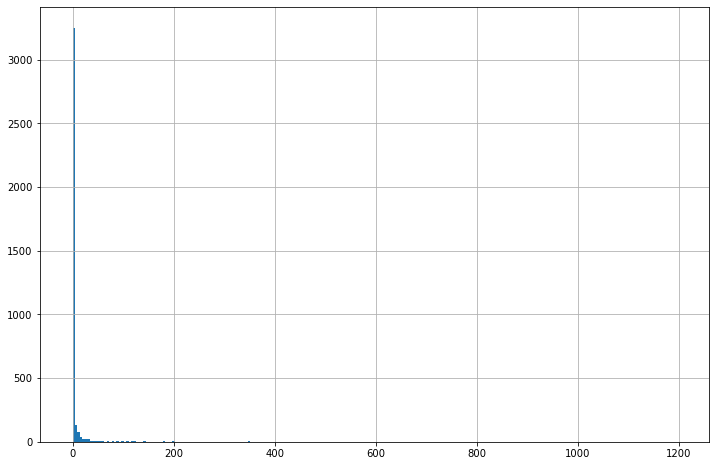

In [27]:
spills_df['Oil_bbls_spilled'].hist( bins=250, figsize=(12,8))

##### 5) Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y/N/n values need to be standardized

Both of these columns have different values. Assuming they are the same (there isn't a different between Y and y), I want to replace these. Let's use the replace command with a dictionary to do both columns and values.

Replacing/Dropping NaNs - Most Machine Learning algorithms won't process a record with NaNs so I usually replace them. If reasonable, NaNs can be replaced with a zero value or Negative binary variable. In other cases such as the NaN being in the target variable, it might be better to drop those rows and not consider them. For this exercise, I'm assuming NaNs mean `N` but would confirm this with the data owner or subject matter expert.

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.
- "" in Oil_BBLs_Spilled means Unknown and I replace with NaN
- Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y & N/n values are the same; NaNs can be converted to N

In [14]:
yn_dict = {
            'y': 'Y',
            'n': 'N'
            }

In [15]:
spills_df.loc[:,'Spilled_outside_of_berms':'More_than_five_barrels_spilled']

,Spilled_outside_of_berms,More_than_five_barrels_spilled
1,N,N
3,N,N
4,Y,Y
5,Y,N
7,Y,N
...,...,...
10882,NaN,N
10883,NaN,n
10884,NaN,n
10885,NaN,N


In [16]:
spills_df['Spilled_outside_of_berms'] = spills_df['Spilled_outside_of_berms'].replace(yn_dict)
spills_df['Spilled_outside_of_berms'].value_counts(dropna=False)

Y      7963
N      2517
NaN     313
Name: Spilled_outside_of_berms, dtype: int64

In [17]:
spills_df['More_than_five_barrels_spilled'] = spills_df['More_than_five_barrels_spilled'].replace(yn_dict)
spills_df['More_than_five_barrels_spilled'].value_counts(dropna=False)

N    5926
Y    4867
Name: More_than_five_barrels_spilled, dtype: int64

##### 6) Standardize the binary columns to 1.0/0.0

Y/N, 1.0/0.0 & True/False all in the dataset

This is helpful to standardize the dataset and to have numerical values for machine learning. 

I am making a small assumption that Y/N 1/0 T/F values can be treated the same throughout. I'm also making a larger assumption here that NaN values in this column can be replaced with 0s. If the NaN values are meaningful than I could make another FLAG column that has a 1 for the not filled out (NaNs) and 0s for filled out.

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.
- "" in Oil_BBLs_Spilled means Unknown and I replace with NaN
- Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y & N/n values are the same; NaNs can be converted to N
- Y/N 1/0 T/F values can be treated the same in these columns: 
  - Spilled_outside_of_berms, More_than_five_barrels_spilled, Waters_of_the_State, Residence_Occupied_Structure, Livestock	Public_Byway, Surface_Water_Supply_Area, Corrective_Actions_Completed 
- NaNs in the same columns can be made 0s

I'm going to make a function to map the values of the column to new values. As shown above in the last step, I could do this with a dictionary also - the dictionary way is more efficient but if you have a complex column that may not be easy to match you will have to make your own function.

In [28]:
def convert_binary_column(value):
    if value in ['Y', 1.0, 1, '1', '1.0']:
        return 1
    else:
        return 0

In [29]:
indicator_cols = ['Spilled_outside_of_berms', 'More_than_five_barrels_spilled', 'Waters_of_the_state', 
            'Residence_occupied_structure', 'Livestock', 'Public_byway', 'Surface_water_supply_area']

In [30]:
spills_df['Spilled_outside_of_berms'].value_counts(dropna=False)

Y      7963
N      2517
NaN     313
Name: Spilled_outside_of_berms, dtype: int64

In [31]:
for col in indicator_cols:
    spills_df[col] = spills_df[col].apply(convert_binary_column)

In [32]:
spills_df['Spilled_outside_of_berms'].value_counts(dropna=False)

1    7963
0    2830
Name: Spilled_outside_of_berms, dtype: int64

If the column is a boolean one I can use a trick by converting that column to an integer:

In [33]:
spills_df['Corrective_actions_completed'].value_counts(dropna=False)

False    8332
True     2461
Name: Corrective_actions_completed, dtype: int64

In [34]:
spills_df['Corrective_actions_completed'] = spills_df['Corrective_actions_completed'].astype(int)

In [35]:
spills_df['Corrective_actions_completed'].value_counts(dropna=False)

0    8332
1    2461
Name: Corrective_actions_completed, dtype: int64

In fact I'm going to do that for all of these columns so that their types are all the same

In [37]:
for col in indicator_cols:
    spills_df[col] = spills_df[col].astype(int)

In [38]:
spills_df[indicator_cols].dtypes

Spilled_outside_of_berms          int32
More_than_five_barrels_spilled    int32
Waters_of_the_state               int32
Residence_occupied_structure      int32
Livestock                         int32
Public_byway                      int32
Surface_water_supply_area         int32
dtype: object

##### 7) Drop columns: 

Report, Tracking_Num, Latitude, Longitude, Municipality, Facility_ID, Weather_Conditions, Spill_Description - not useful for our analysis

Oil_Spill_Volume - made new flag columns

Generally, I wouldnt drop columns unless like the Oil_Spill_Volume, I've already made new columns based on it. For the rest, if I was on the fence I would keep them. For this anaylsis I don't believe any of those columns have pertinant data so I'm going to drop them but I will add that to the assumptions. If later I do need them I can come back to this section and not drop them

#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.
- "" in Oil_BBLs_Spilled means Unknown and I replace with NaN
- Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y & N/n values are the same; NaNs can be converted to N
- Y/N 1/0 T/F values can be treated the same in these columns: 
  - Spilled_outside_of_berms, More_than_five_barrels_spilled, Waters_of_the_State, Residence_Occupied_Structure, Livestock	Public_Byway, Surface_Water_Supply_Area, Corrective_Actions_Completed 
- NaNs in the same columns can be made 0s
- Ok to drop these columns:
  - Report, Tracking_Num, Latitude, Longitude, Municipality, Facility_ID, Weather_Conditions, Spill_Description, Oil_Spill_Volume

In [39]:
drop_cols = ['Report', 'Tracking_num', 'Latitude', 'Longitude', 'Municipality', 'Facility_id', 
             'Weather_conditions', 'Spill_description', 'Oil_spill_volume']

In [40]:
spills_df = spills_df.drop(drop_cols, axis=1)

In [41]:
spills_df.columns

Index(['Document_num', 'Operator', 'Operator_num', 'Initial_report_date',
       'Date_of_discovery', 'County', 'Facility_type',
       'Spilled_outside_of_berms', 'More_than_five_barrels_spilled',
       'Current_land_use', 'Waters_of_the_state',
       'Residence_occupied_structure', 'Livestock', 'Public_byway',
       'Surface_water_supply_area', 'Oil_bbls_spilled', 'Oil_bbls_recovered',
       'Oil_unknown', 'Corrective_actions_completed', 'OSV_0', 'OSV_gt_0_lt_1',
       'OSV_gte_1_lt_5', 'OSV_gte_100', 'OSV_gte_5_lt_100', 'OSV_Unknown'],
      dtype='object')

#### Note:

When to saving a file / saving to the database. My decision on that is if that script takes a long time to run (over an hour) then I'll save it after it is finished and start a new script from that point. 

- NOTE: I do not suggest saving a new dataframe for each question asked as what might happen is the 'thread' of truth in the data will get lost. I'm using one dataframe from start to finish so that each step builds on each other and the information on how I got to the final product isn't lost. I find having one groud truth dataset is better than having 4-5 subsets. 

In [42]:
spills_df.to_csv("CO_Spills_cleaned.csv", index=False)

#### Ending comments:

Now our dataframe is ready for analysis - which will be explained in the next lesson.